# Sky plot of the PPTA pulsars

Produces a plot of the PPTA pulsar positions on the sky at Parkes at the time it is run.

Author: James Dempsey on 13 Jan 2019

In [1]:
import datetime

from astropy.coordinates import EarthLocation
from astropy.time import Time
from astropy import units as u
from astropy.coordinates import AltAz
from astropy.coordinates import SkyCoord
from astropy.table import Table

%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

In [2]:
# List of PPTA pulsars - columns are name, priority, ra (hms) and dec (dms)
pulsar_list = [['Hydra', 1, '09h18m05.7s', '-12d05m44s'],
['J0437-4715', 1, '04:37:15.8961737', '-47:15:09.110714'],
['J0613-0200', 3, '06:13', '-02:00'],
['J0711-6830', 2, '07:11:54.189114', '-68:30:47.41446'],
['J1017-7156', 1, '10:17:51.32828', '-71:56:41.64586'],
['J1022+1001', 3, '10:22', '+10:01'],
['J1024-0719', 4, '10:24', '-07:19'],
['J1045-4509', 4, '10:45:50.18696', '-45:09:54.1223'],
['J1125-6014', 3, '11:25:55.2180', '-60:14:06.608'],
['J1446-4701', 3, '14:46:35.71391', '-47:01:26.7675'],
['J1545-4550', 2, '15:45:55.94596', '-45:50:37.5272'],
['J1600-3053', 3, '16:00', '-30:53'],
['J1603-7202', 2, '16:03:35.60', '-72:02:32.6'],
['J1643-1224', 3, '16:43', '-12:24'],
['J1713+0747', 1, '17:13', '+07:47'],
['J1730-2304', 3, '17:30:21.66624', '-23:04:31.19'],
['J1744-1134', 3, '17:44', '-11:34'],
['J1824-2452A', 4, '18:24:32.00788', '-24:52:10.834'],
['J1832-0836', 3, '18:32', '-08:36'],
['J1857+0943', 3, '18:57', '+09:43'],
['J1909-3744', 1, '19:09:47.4346749', '-37:44:14.46674'],
['J1933-6211', 2, '19:33:32','-62:11:46'],
['J1939+2134', 3, '19:39:38.561224', '+21:34:59.12570'],
['J2124-3358', 3, '21:24:43.849372','-33:58:44.8500'],
['J2129-5721', 2, '21:29:22.766966','-57:21:14.21183'],
['J2145-0750', 3, '21:45:50.460593','-07:50:18.4876'],
['J2241-5236', 1, '22:41:42.01850','-52:36:36.2260'],
['J0030+0451', 4, '00:30', '+04:51'],
['J0034-0534', 4, '00:34', '-05:34'],
['J0101-6422', 4, '01:01', '-64:22'],
['J0348+0432', 4, '03:48', '+04:32'],
['J0614-3329', 4, '06:14', '-33:29'],
['J1023+0038', 4, '10:23', '+00:38'],
['J1741+1351', 4, '17:41', '+13:51'],
['J1902-5105', 4, '19:02', '-51:05'],
['J2051-0827', 4, '20:51', '-08:27'],
['J2256-1024', 4, '22:56', '-10:24'],
['J0125-2327', 4, '01:25', '-23:27'],
['J1705-1903', 4, '17:05', '-19:03'],
['J2039-3616', 4, '20:39', '-36:16']]



In [3]:
ppta_targets = Table(rows=pulsar_list, names=('name', 'priority', 'ra', 'dec'))
target_locs = SkyCoord(ra=ppta_targets['ra'], dec=ppta_targets['dec'], unit=(u.hourangle, u.deg), frame='icrs')
ppta_targets['pos'] = target_locs
#ppta_targets

In [4]:
def calc_sky_loc_parkes(observing_time, targets):
    # Parkes
    observing_location = EarthLocation(lat='-32d59m54.263s', lon='148d15m48.636s', height=414.8*u.m)

    aa = AltAz(location=observing_location, obstime=observing_time)
    
    #target_locs = SkyCoord(target_list, unit=(u.hourangle, u.deg), frame='icrs')
    target_locs = targets['pos']
    sky_locs = target_locs.transform_to(aa)
    return sky_locs
    
def plot_ppta_pulsars_for_parkes(observing_time, targets):
    # Parkes
    observing_location = EarthLocation(lat='-32d59m54.263s', lon='148d15m48.636s', height=414.8*u.m)

    aa = AltAz(location=observing_location, obstime=observing_time)
    
    #target_locs = SkyCoord(target_list, unit=(u.hourangle, u.deg), frame='icrs')
    target_locs = targets['pos']
    sky_locs = target_locs.transform_to(aa)

    theta = sky_locs.az.to(u.rad).value
    r = 90-sky_locs.alt.value

    plt.figure(figsize=(10,10))
    ax = plt.subplot(111, projection='polar')
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_yticklabels(map(str, range(80, 10, -10)))   # Change the labels

    # Add a red circle showing the lowest elevation possible at Parkes
    circle = np.linspace(0,2*np.pi,100)
    ax.plot(circle,[59.75 for t in circle],color='#AA5555')

    # Plot points for pulsars
    ax.scatter(theta, r) #, color='blue')

    # Add lines for the wrap limits
    ax.plot((0, np.radians(294.4)), (0,59.75), ls=':', color='orange')
    ax.plot((0, np.radians(207.0)), (0,59.75), ls=':', color='orange')

    # Limit the displayed radius
    ax.set_rmax(70)

    # Label the pulsars
    for i, row in enumerate(targets):
        fw = 'bold' if row['priority'] <= 2 else 'normal'
        ax.annotate('  ' +row['name'] + ' ('+ str(row['priority'])+')', xy=(theta[i], r[i]), fontweight=fw, fontsize='small')
    
    ax.set_title("PPTA Pulsar Visibility at Parkes as at {} UTC".format(observing_time))
    
    
def print_pulsar_loc(observing_time, targets):
    sky_locs = calc_sky_loc_parkes(observing_time, targets)

    r = sky_locs.alt.value

    print ("PPTA pulsars visible at Parkes as at {} UTC\n".format(observing_time))
    print ("   Name         Az    Alt")
    for i, row in enumerate(targets):
        if r[i] > 20:
            print("{:11}  {:>5.1f}  {:>5.1f}".format(row['name'], sky_locs[i].az.value, r[i]))

#print_pulsar_loc(observing_time, ppta_targets)

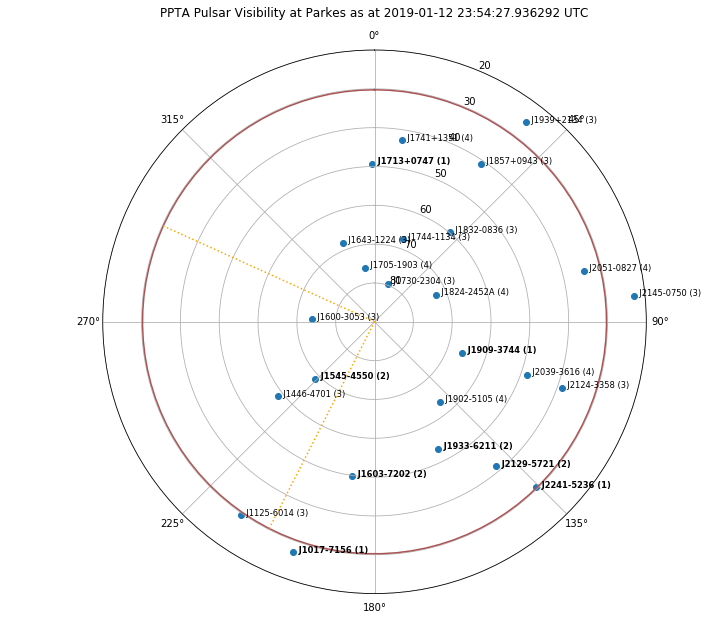

In [5]:
# Now
observing_time = datetime.datetime.utcnow()
#observing_time = Time('2018-10-20 23:50')  # Must be a UTC time

plot_ppta_pulsars_for_parkes(observing_time, ppta_targets)

In [6]:
print_pulsar_loc(observing_time, ppta_targets)

PPTA pulsars visible at Parkes as at 2019-01-12 23:54:27.936292 UTC

   Name         Az    Alt
J1017-7156   199.6   27.0
J1125-6014   214.6   29.5
J1446-4701   232.2   58.7
J1545-4550   226.3   68.6
J1600-3053   272.3   74.0
J1603-7202   188.3   49.8
J1643-1224   338.4   68.2
J1713+0747   359.1   49.2
J1730-2304    19.7   79.5
J1744-1134    18.8   67.6
J1824-2452A   66.2   72.8
J1832-0836    40.3   59.8
J1857+0943    34.0   40.9
J1909-3744   109.6   66.2
J1933-6211   153.4   53.5
J1939+2134    37.3   25.4
J2124-3358   109.4   38.8
J2129-5721   139.9   41.3
J2145-0750    84.3   22.9
J2241-5236   135.7   30.4
J1741+1351     8.5   42.8
J1902-5105   140.7   63.4
J2051-0827    76.3   34.6
J1705-1903   350.1   75.9
J2039-3616   109.2   48.4
